In [24]:
import csv
import numpy as np
import math
from math import log
from math import sqrt
from random import randrange
myname='sneha'
txt_file = "/home/sneha/Desktop/spam.txt"
csv_file = "/home/sneha/Desktop/spam.csv"
in_txt = csv.reader(open(txt_file, "rb"), delimiter = ' ')
out_csv = csv.writer(open(csv_file, 'wb'))
out_csv.writerows(in_txt)

In [25]:
class DecisionTree():
    tree = {}
    #gini index calculation function
    def Gini(self,new_result):
        if(len(new_result)==0):
            return 0
        count_0=float(new_result.count(0))/len(new_result)
        count_1=float(new_result.count(1))/len(new_result)
        r = 1-(count_0*count_0)-(count_1*count_1)
        return r
    #random colum selection
    def colum_select(self,num_features):
        new_col=[]
        while len(new_col) <= num_features:
            index = randrange(57)
            if index not in new_col:
                new_col.append(index)
        return new_col
    #random row selection
    def subsample(self,train_set, ratio):
        sample =[]
        sample_index=[]
        n_sample = int(train_set.shape[0] * ratio)
        while len(sample) < n_sample:
            index = randrange(len(train_set))
            sample_index.append(index)
            sample.append(train_set[index])
        return np.array(sample),sample_index

    #when only one colum left then it will return 0,if count of 0 is more in label otherwise one
    def majorClass(self,col, train_set):
        a=np.array([])    
        if(train_set.shape==a.shape):
            return 0
        else:
            result_train=train_set[:,-1]
            result_train=list(result_train)

            for i in result_train:
                count_0=result_train.count(0)
                count_1=result_train.count(1)
                if(count_0>=count_1):
                    return 0
                else:
                    return 1
    #This function return the max vaule in the colum divided by 10  
    def Max(self,train_set,col):
        max_val=np.amax(train_set,axis=0)
        return max_val[col]/10
        
     #This function returns the best column which has highest information gain     
    def BestCol(self,train_set,col):
        col_num=13
        result_train=train_set[:,-1]
        train_set=train_set[:,:-1]
        new_result=list(result_train)
        gini_gain=0.0
        val=np.amax(train_set,axis=0)
        gini=DecisionTree.Gini(self,new_result)
        left_rel=[]
        right_rel=[]
        for i in col:
            count_left=0
            count_right=0
            left_result=[]
            right_result=[]
            for j in range(train_set.shape[0]):
                if(train_set[j,i] <= val[i]/10):
                    count_left=count_left+1
                    left_result.append(result_train[j])
                else:
                    count_right=count_right+1
                    right_result.append(result_train[j])
        
        
            gini_1=(float(count_left)/len(new_result))*(DecisionTree.Gini(self,left_result))
            gini_1=gini_1+(float(len(right_result))/len(new_result))*(DecisionTree.Gini(self,right_result))
            
        
            gini_gain_test = float(gini)-gini_1
            if( gini_gain_test >gini_gain ):
                gini_gain=gini_gain_test
                col_num=i
                left_rel=left_result
                right_rel=right_result

        if(gini_gain_test==0):
            return None
        return col_num
        
    #this function returns the two numpy array i.e split of given numpy 'left and right'     
    def Split(self,train_set,col_num,val):
        right=[]
        left=[]
        for j in range(train_set.shape[0]):
            if(train_set[j,col_num]<=val):
                left.append(train_set[j])
            else:
                right.append(train_set[j])
        right=np.array(right)
        left=np.array(left)
        return left,right
     # this function forms the tree
    def TreeForm(self,train_set,col):
        tree={}
        default = DecisionTree.majorClass(self,col, train_set)

        
        if not train_set.shape[0] or (len(col) - 1) <= 0:
            return default
        result_train=train_set[:,-1]
        result_train=list(result_train)
        count_0=result_train.count(0)
        count_1=result_train.count(1)
        if ( (count_0==len(result_train)) or (count_1==len(result_train)) ):
            if(count_0>=count_1):
                return 0
            else:
                return 1
            
        else:
            best = DecisionTree.BestCol(self,train_set,col) 
            if(best==None):
                return default
            best_1=dic[best]
            tree = {best_1: {}}
            val=DecisionTree.Max(self,train_set,best)
            new_dataleft,new_dataright = DecisionTree.Split(self,train_set,best, val)
            newAttr = DecisionTree.colum_select(self,num_features)
            sub1=DecisionTree.TreeForm(self,new_dataleft,newAttr)
            sub2=DecisionTree.TreeForm(self,new_dataright,newAttr)
            tree[best_1]['1']=sub1
            tree[best_1]['2']=sub2
            tree[best_1]['max']=val
            return tree
        
    def learn(self, train_set,new_col):
        self.tree=DecisionTree.TreeForm(self,train_set,new_col)
        
    def classify(self, test_instance, dict_3):
        key_list=[]
        for key in dict_3:
            key_list.append(key)
        s=key_list[0]
        col_num = dic_test[s]
        if( test_instance[col_num] <= dict_3[s]['max'] ):
            t= dict_3[s]
            if (type(t['1'])==type(0)):
                return t['1']

            else:
                d=DecisionTree.classify(self,test_instance,t['1'])
                return d
        else:
            t= dict_3[s]
            if (type(t['2'])==type(0)):
                return t['2']

            else:
                d= DecisionTree.classify(self,test_instance,t['2'])
                return d
    
        

In [26]:
import numpy as np
def column_name():
    colum=[]
    for i in range(57):
        colum.append(i)
    dic={}
    dic_test={}
    for i in range(57):
        dic[i]=str(i)
        dic_test[str(i)]=i
    return colum,dic,dic_test

def run_decision_tree(num):
    tree = DecisionTree()
    # random selection of colum
    new_col=tree.colum_select(num_features)
    # random selection of rows
    sample,sample_index=tree.subsample(training_set,ratio)
    train_sets_list.append(sample_index)
    tree.learn(sample,new_col)
    new_dic=tree.__dict__  
    trees_in_dict[num]=new_dic['tree']
    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify(instance[:-1],new_dic['tree'] )  
        results.append( result)
    final_results.append(results) 

def out_of_bag_error(sample_list,num_of_trees,training_set,oob_result):
            tree = DecisionTree()
            for i in range(training_set.shape[0]):
                li=[]
                for j in range(num_of_trees):
                    if(i not in sample_list[j]):
                        result = tree.classify(training_set[i][:-1],trees_in_dict[j])  
                        li.append(result)
                if(len(li)>0):
                    count_0=li.count(0)
                    count_1=li.count(1)
                    if(count_1>count_0):
                        li=1
                    else:
                        li=0
                        
                    oob_result.append(li==training_set[i][-1])
             # Accuracy
            accuracy = float(oob_result.count(True))/float(len(oob_result))
            return accuracy  


        
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


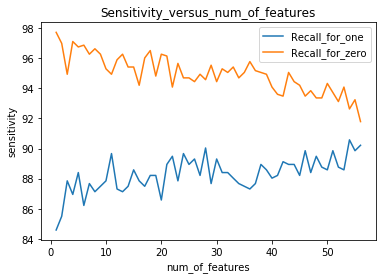

In [27]:
import matplotlib.pyplot as plt 
if __name__ == "__main__":
    data = np.genfromtxt ('/home/sneha/Desktop/spam.csv', delimiter=",")
    np.random.shuffle(data)
    a=int(data.shape[0]*30/100)
    test_set=data[:a]
    training_set=data[a:]
    colum,dic,dic_test=column_name()
    test_error=[]
    out_of_bag_error_list=[]
    num_of_feature_used=[]
    recall_zero_list=[]
    recall_one_list=[]
    #finding the sensitivity at each feature from 1 to 56
    for h in range(56): 
        oob_result=[]
        train_sets_list=[]
        trees_in_dict={}
        final_results = []
        colum=[]
        ratio=0.6
        num_of_trees=35
        num_features=h+1
        #     y_true=list(test_set[:,-1])
        true_positive_zero=0
        false_negative_zero=0
        true_positive_one=0
        false_negative_one=0
        num_of_feature_used.append(num_features)
        for i in range(num_of_trees):
            run_decision_tree(i)
        final_results=np.array(final_results)
        final_results=list(np.sum(final_results,axis=0))
        result=[]
        for i in range(len(final_results)):
            if(final_results[i]>(num_of_trees-final_results[i])):
                final_results[i]=1
                if(final_results[i] == (test_set[i][-1])):
                    true_positive_one=true_positive_one+1
                else:
                    false_negative_zero=false_negative_zero+1


            else:
                final_results[i]=0
                if( final_results[i] == (test_set[i][-1])):
                    true_positive_zero=true_positive_zero+1
                else:
                    false_negative_one=false_negative_one+1
        recall_zero=float(true_positive_zero)/(true_positive_zero+false_negative_zero)
        recall_one=float(true_positive_one)/(true_positive_one+false_negative_one)
        recall_zero=round(recall_zero*100,2)
        recall_one=round(recall_one*100,2)
        recall_one_list.append(recall_one)
        recall_zero_list.append(recall_zero)

         
    #ploting the graph of sensitivity versus num_of_features
    plt.plot(num_of_feature_used, recall_one_list)
    plt.plot(num_of_feature_used,recall_zero_list)
    plt.legend(['Recall_for_one','Recall_for_zero'],loc = 'bottom right')
  
    # naming the x axis 
    plt.xlabel('num_of_features') 
    # naming the y axis 
    plt.ylabel('sensitivity') 
  
    # giving a title to my graph 
    plt.title('Sensitivity_versus_num_of_features') 
    fig = plt.gcf()
    # function to show the plot 
    plt.show() 
    fig.savefig('sensitivity.png')
